<a href="https://colab.research.google.com/github/Team-AlmaBetter/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
* ### X6 = the repayment status in September, 2005; 
* ### X7 = the repayment status in August, 2005; . . .;
* ### 8 = payment delay for eight months; 
* ### 9 = payment delay for nine months and above.
* ### X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months;
* ### X12-X17: Amount of bill statement (NT dollar). 
* ### X12 = amount of bill statement in September, 2005; 
* ### X13 = amount of bill statement in August, 2005; 
* ### X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). 
* ### X18 = amount paid in September, 2005; 
* ### X19 = amount paid in August, 2005; 
* ### X23 = amount paid in April, 2005.

#<b>1. IMPORT LIBRARIES

In [158]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV/Excel file I/O (e.g. pd.read_excel), data manipulation
from scipy.stats import randint
import matplotlib.pyplot as plt # this is used to plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn
import seaborn as sns

# import the libraries used for machine learning


from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

#<B>2. DATA PREPARATION

##<b> 2.1 Import Datasets

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
credit = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction_Project_3/Data & Resources/default of credit card clients.xls')


##<B>Check the data


In [100]:
print("Default Credit Card Clients data -  rows:",credit.shape[0]," columns:", credit.shape[1])

Default Credit Card Clients data -  rows: 30001  columns: 25


##<B>Glimpse of data

In [101]:
credit.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [102]:
credit.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1



###<B> 2.2 Converting the column names to proper names

###Renaming column **PAY_0 to PAY_1** and **default.payment.next.month as DEFAULT**

In [103]:
new_column_names=list(credit.iloc[0].values)
new_column_names[-1]='DEFAULT'
new_column_names[6]='PAY_1'
old_column_names=list(credit.columns)

In [104]:
old_column_names=list(credit.columns)
dict1=dict(zip(old_column_names,new_column_names))
credit.rename(columns=dict1,inplace=True)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [105]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [106]:
credit=credit.iloc[1:,:]
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Check duplicate records


In [107]:
# Check if there is any duplicate IDs
condition = bool(credit.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs



## Identify Outliers

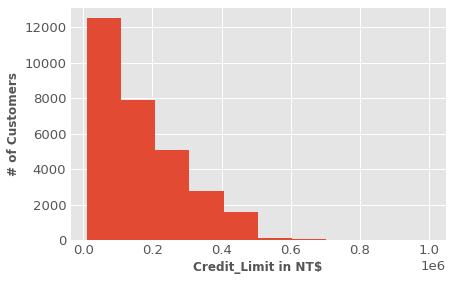

In [108]:
# Use histogram to view the distribution of credit limit

plt.hist(credit["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

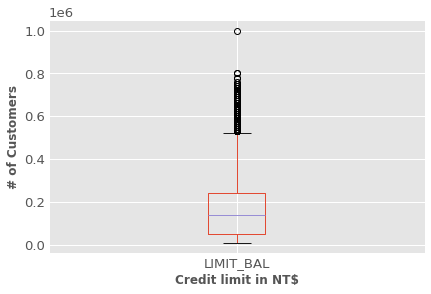

In [109]:
# Use boxplot to identify any outlier in credit limit

credit["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [110]:
# Take a close look at the outlier
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = credit.loc[credit['LIMIT_BAL']>900000]
outliers

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
2198,2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


### Convert the datatype of all the columns to integer


In [111]:
credit=credit.astype(int)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

###Descriptive Statistics
Let's look into more details to the data - checking numerical columns.

In [112]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


There are 30,000 distinct credit card clients.

The average value for the amount of credit card limit is 167,489. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

##<B>Check the missing data

In [113]:
total = credit.isnull().sum().sort_values(ascending = False)
percent = (credit.isnull().sum()/credit.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,DEFAULT,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,ID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###There is no missing data in the entire dataset.


#<B> DATA VISUALIZATION AND ANALYSIS

Let's check data unbalance with respect with target value, i.e. **DEFAULT(default.payment.next.month)**


In [114]:
print(credit["DEFAULT"].value_counts())

0    23364
1     6636
Name: DEFAULT, dtype: int64


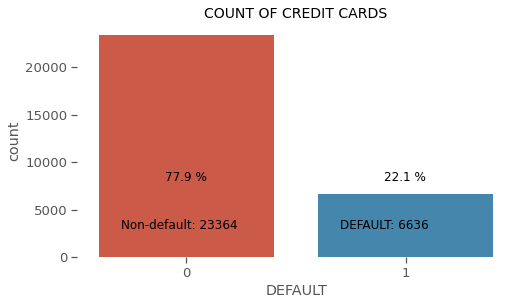

In [115]:
# The frequency of defaults
yes = credit.DEFAULT.sum()
no = len(credit)-yes

# Percentage
yes_perc = round(yes/len(credit)*100, 1)
no_perc = round(no/len(credit)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('DEFAULT',data=credit)
sns.set_color_codes("pastel")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('DEFAULT: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

###A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).



```
# This is formatted as code
```

##<B>Defaulters Pie Chart

In [116]:
Num_of_Default = round(credit['DEFAULT'].value_counts()[1]/len(credit)*100,3)
Num_of_NonDefault = round(credit['DEFAULT'].value_counts()[0]/len(credit)*100,3)


print("Number of Default Values :\t\t\t   ",credit['DEFAULT'].value_counts()[1])
print("Number of Non Default Values :\t\t\t    ",credit['DEFAULT'].value_counts()[0])
print("\n")
print("Percentage of Default :  \t\t ", Num_of_Default)
print("Percentage of Non default :\t\t  ",Num_of_NonDefault)

Number of Default Values :			    6636
Number of Non Default Values :			     23364


Percentage of Default :  		  22.12
Percentage of Non default :		   77.88


Pie Chart:


Text(0, 0.5, '')

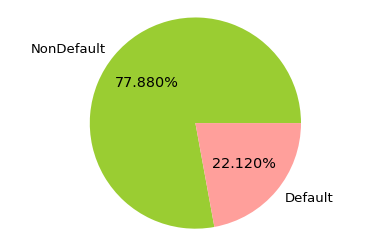

In [117]:
print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(credit.DEFAULT.value_counts(),autopct='%1.3f%%', labels=['NonDefault','Default'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

### Checking the correlation of DEFAULT variable with other numeric variables

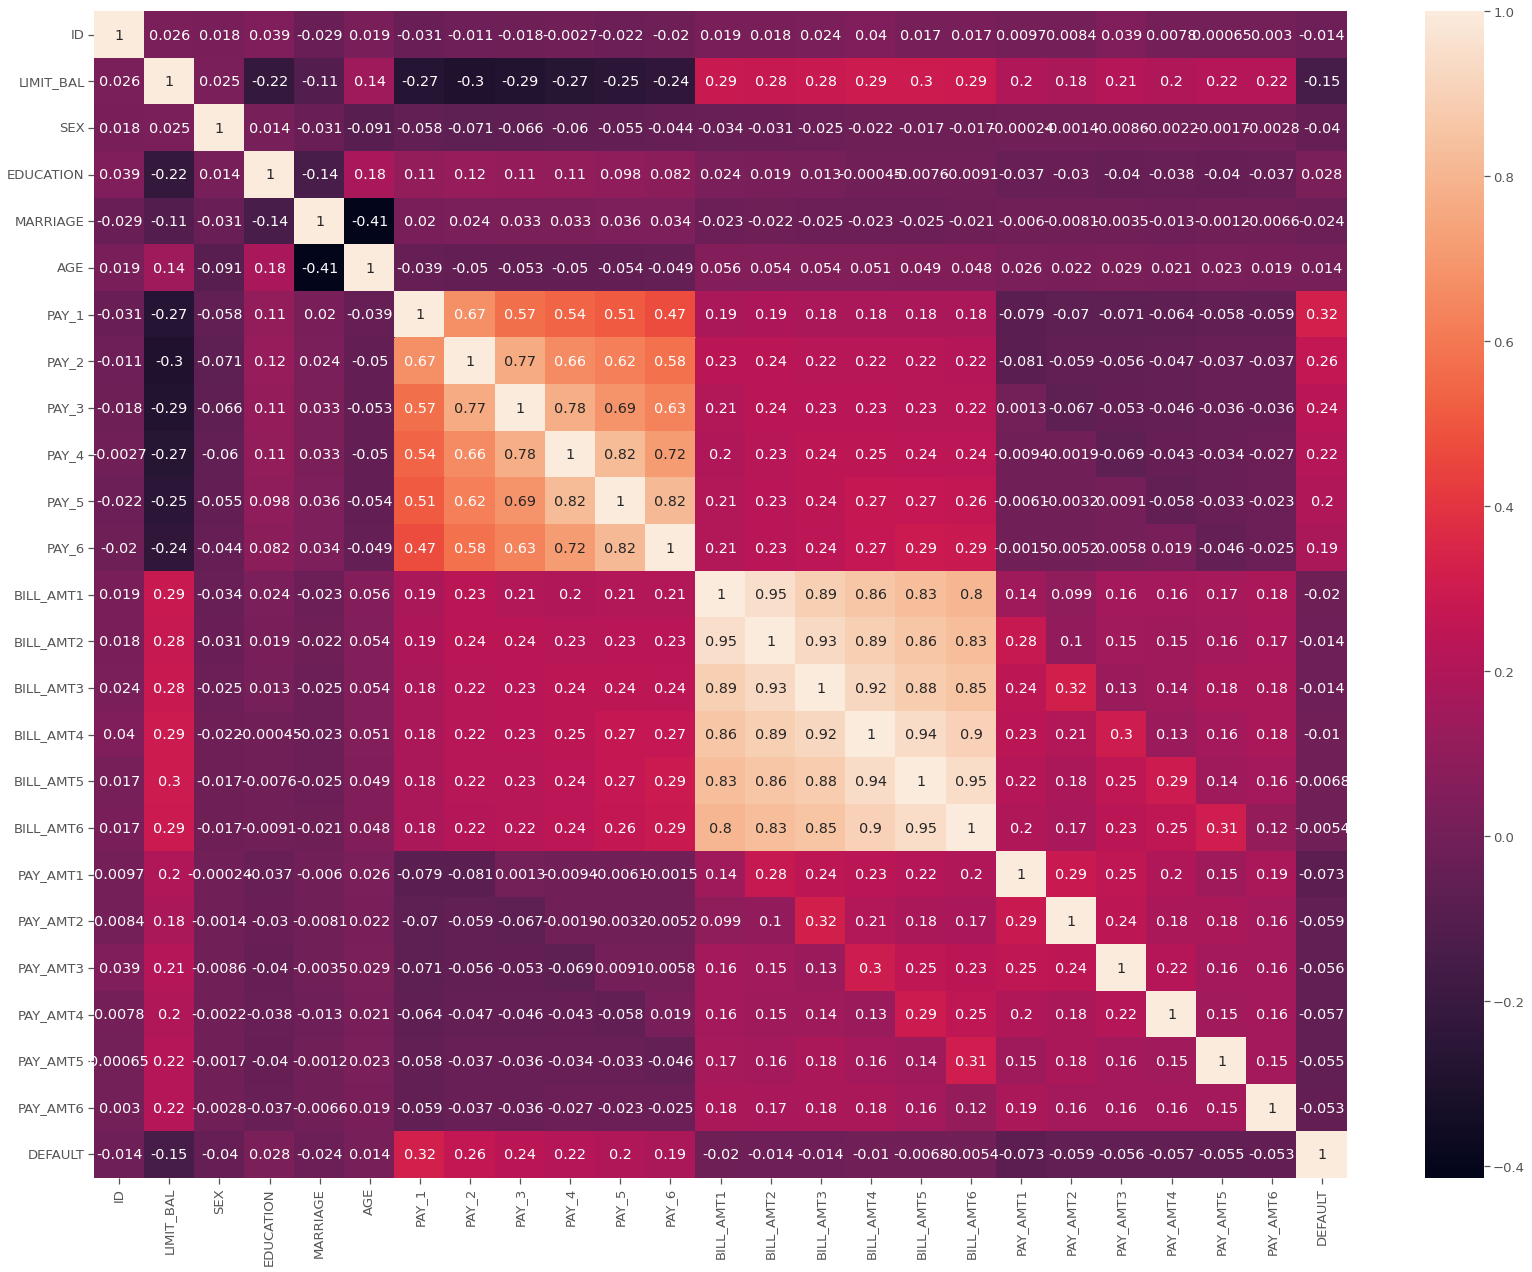

In [118]:
plt.subplots(figsize = (25,20))
sns.heatmap(credit.corr(), annot=True)
plt.show()

### Convert int variables to factors 1. DEFAULT to a categorical variable 

In [119]:
credit['DEFAULT']=pd.Categorical(credit.DEFAULT)

## Gender

### Convert int variables to factors 1. SEX to a categorical variable 

In [120]:
credit['SEX']=pd.Categorical(credit.SEX)

### Featuring - Add one feature of GENDER 

Text(0.5, 1.0, 'SEX v/s COUNT')

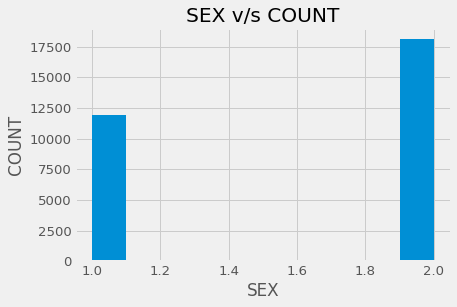

In [121]:
plt.style.use('fivethirtyeight')
credit['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

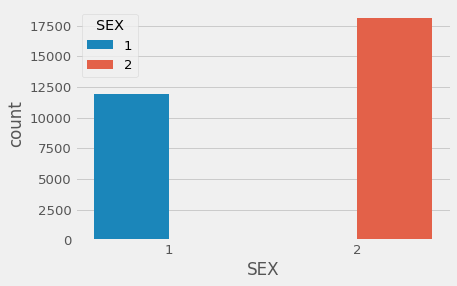

In [122]:
sns.countplot(x='SEX',data=credit,hue = 'SEX')

###Number of Male credit card holder is less than Female.


DEFAULT      0     1
SEX                 
1         9015  2873
2        14349  3763


<Figure size 720x720 with 0 Axes>

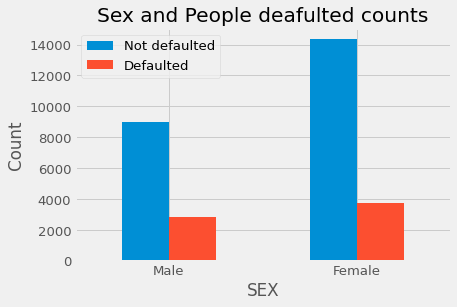

In [123]:
target_count = credit.groupby(['SEX','DEFAULT']).SEX.count().unstack()
print(target_count)
plt.figure(figsize=(10,10))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

###It is evident from the above output that females have overall less default payments wrt males

###Non-Defaults have a higher proportion of Females (Sex=2)

## EDUCATION

### Converting EDUCATION to a categorical variable

In [124]:
credit["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others
we will convert 0,5,6 to 4 which is other

In [125]:
credit.EDUCATION=pd.Categorical(credit.EDUCATION)

In [126]:
credit.EDUCATION.unique()

[2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [2, 1, 3, 5, 4, 6, 0]

### Merging 0, 5 and 6 to 4(others)

In [127]:
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(0,4) )
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(5,4) )
credit.EDUCATION=credit.apply(lambda x: credit.EDUCATION.replace(6,4) )

In [128]:
credit.EDUCATION.unique()

array([2, 1, 3, 4])

### Plotting Bar graph for EDUCATION

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

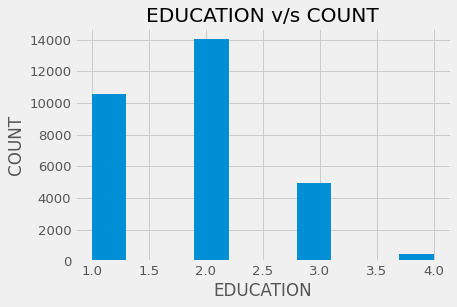

In [129]:
plt.style.use('fivethirtyeight')
credit['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

###More number of credit holders are university students followed by Graduates and then High school students.



1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64


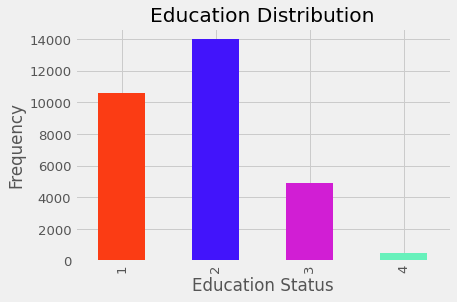

In [130]:
plt.figure()
colors=['#FB3C14','#4214FB','#D11ED4','#67F1BB','#DCE22A','#4EED4C','#F99F16']
print(credit["EDUCATION"].value_counts().sort_index(ascending=True))
p=credit["EDUCATION"].value_counts().sort_index(ascending=True).plot(kind='bar', color=colors)
plt.title('Education Distribution')
plt.xlabel("Education Status")
plt.ylabel("Frequency")
plt.show()

### Find out Default % in all education type

1    2036
2    3330
3    1237
4      33
Name: EDUCATION, dtype: int64


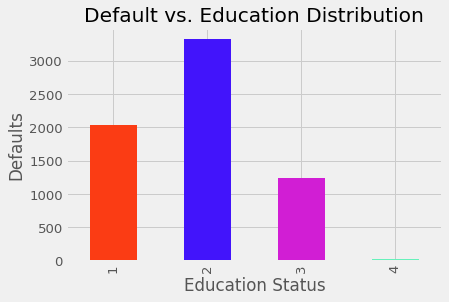

In [131]:
#get all people with defaults
default=credit[credit['DEFAULT']==1]
print(default['EDUCATION'].value_counts().sort_index(ascending=True))

plt.figure()
colors=['#FB3C14','#4214FB','#D11ED4','#67F1BB','#DCE22A','#4EED4C','#F99F16']
p=default["EDUCATION"].value_counts().sort_index(ascending=True).plot(kind='bar', color=colors)
plt.title('Default vs. Education Distribution')
plt.xlabel("Education Status")
plt.ylabel("Defaults")
plt.show()

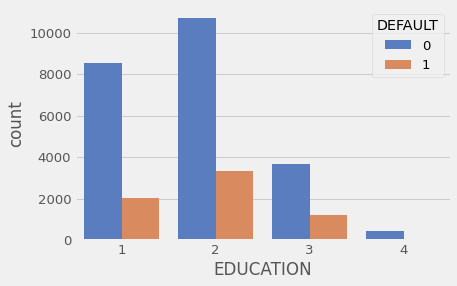

In [132]:
g=sns.countplot(x="EDUCATION", data=credit,hue="DEFAULT", palette="muted")

####From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people.

In [133]:
credit["EDUCATION_CAT"]='none'

In [134]:
credit[["EDUCATION_CAT",'EDUCATION']].head(5)

,EDUCATION_CAT,EDUCATION
1,none,2
2,none,2
3,none,2
4,none,2
5,none,2


In [135]:
cat_mapping={
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
    }

In [136]:
credit["EDUCATION_CAT"]=credit["EDUCATION"].map(cat_mapping)
credit[["EDUCATION","EDUCATION_CAT"]].head(10)

,EDUCATION,EDUCATION_CAT
1,2,university
2,2,university
3,2,university
4,2,university
5,2,university
6,1,graduate school
7,1,graduate school
8,2,university
9,3,high school
10,3,high school


In [137]:
edu=pd.get_dummies(credit["EDUCATION_CAT"])
edu.head(5)

,graduate school,high school,others,university
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [138]:
df=pd.concat([credit,edu],axis=1)
df[["EDUCATION_CAT","graduate school","high school","university","others"]].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,university,0,0,1,0
6,graduate school,1,0,0,0
7,graduate school,1,0,0,0
8,university,0,0,1,0
9,high school,0,1,0,0
10,high school,0,1,0,0


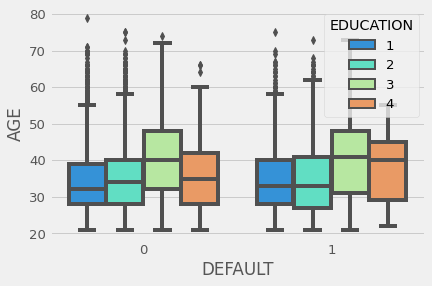

In [139]:
sns.boxplot(x='DEFAULT',hue='EDUCATION', y='AGE',data=credit,palette="rainbow" )

## MARRIAGE 
###Checking the unique value of MARRIAGE variable


In [140]:
credit["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [141]:
pd.unique(credit['MARRIAGE'])

array([1, 2, 3, 0])

### Here we found that there are 4 unique value of MARRIAGE
1 for Married

2 for Unmarried

3 for Others

0 for Divorce (Maybe)

So we merge 0 to 3 (i.e. others)

In [142]:
credit.MARRIAGE=credit.apply(lambda x: credit.MARRIAGE.replace(0,3) )

In [143]:
pd.unique(credit['MARRIAGE'])

array([1, 2, 3])

##Convert to a categorical variable

In [144]:
#converting numerical to categorical data
credit.MARRIAGE=pd.Categorical(credit.MARRIAGE)

pd.cut(credit.MARRIAGE,bins=[0,1,2,3],labels=['Married', 'Unmarried', 'Others'])


1          Married
2        Unmarried
3        Unmarried
4          Married
5          Married
           ...    
29996      Married
29997    Unmarried
29998    Unmarried
29999      Married
30000      Married
Name: MARRIAGE, Length: 30000, dtype: category
Categories (3, object): ['Married' < 'Unmarried' < 'Others']

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

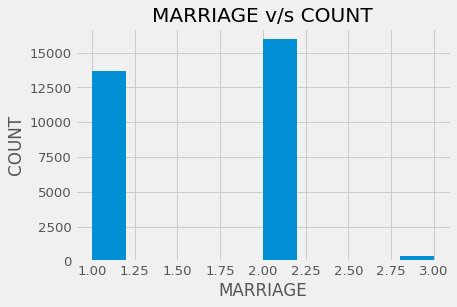

In [145]:
plt.style.use('fivethirtyeight')
credit['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

###More number of credit cards holder are Married.

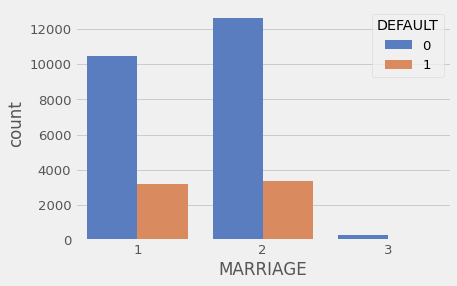

In [146]:
g=sns.countplot(x="MARRIAGE", data=credit,hue="DEFAULT", palette="muted")

From the above plot it is clear that those people who have marital status single have less default payment wrt married status people.

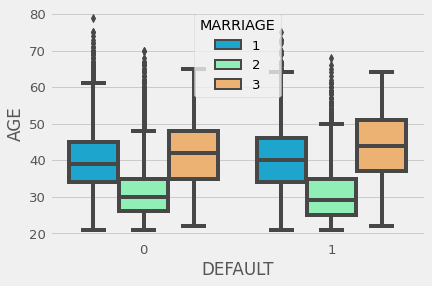

In [147]:
sns.boxplot(x='DEFAULT',hue='MARRIAGE', y='AGE',data=credit,palette="rainbow")

# **Create new variable 'MARITAL STATUS'**

In [148]:
credit["MARITAL_STATUS"]='none'
credit[["MARITAL_STATUS",'MARRIAGE']].head(10)

,MARITAL_STATUS,MARRIAGE
1,none,1
2,none,2
3,none,2
4,none,1
5,none,1
6,none,2
7,none,2
8,none,2
9,none,1
10,none,2


In [149]:
cat_mapping1={
    1:"Married",
    2:"Unmarried",
    3:"Others"
    }

In [150]:
credit["MARITAL_STATUS"]=credit["MARRIAGE"].map(cat_mapping1)
credit[["MARITAL_STATUS","MARRIAGE"]].head(10)

,MARITAL_STATUS,MARRIAGE
1,Married,1
2,Unmarried,2
3,Unmarried,2
4,Married,1
5,Married,1
6,Unmarried,2
7,Unmarried,2
8,Unmarried,2
9,Married,1
10,Unmarried,2


In [151]:
#creating new dataframe 
marital_df= credit.filter(["MARITAL_STATUS","DEFAULT"])
marital_df= marital_df.astype({"MARITAL_STATUS": str,"DEFAULT": int})
marital_df.head()

,MARITAL_STATUS,DEFAULT
1,Married,1
2,Unmarried,1
3,Unmarried,0
4,Married,0
5,Married,0


In [152]:
cross_tab_marital = pd.crosstab(index=marital_df['MARITAL_STATUS'],
                             columns=marital_df['DEFAULT'],
                             normalize="index")
cross_tab_marital


DEFAULT,0,1
MARITAL_STATUS,,
Married,0.765283,0.234717
Others,0.763926,0.236074
Unmarried,0.790717,0.209283


#PAY_1 - Finding all the unique values PAY_1 has.

In [153]:
pd.unique(credit['PAY_1'])

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

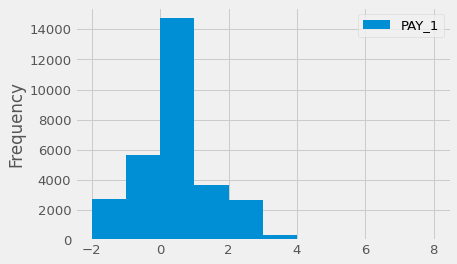

In [154]:
credit.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

##Changing this variable into a categorical variable 

In [155]:
#changing data into categorical value
credit.PAY_1=pd.Categorical(credit.PAY_1)

In [166]:
sns.barplot(x='PAY_1', y='DEFAULT', data=credit, estimator=lambda x: sum(x==0)*100.0/len(x))

TypeError: ignored

In [164]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

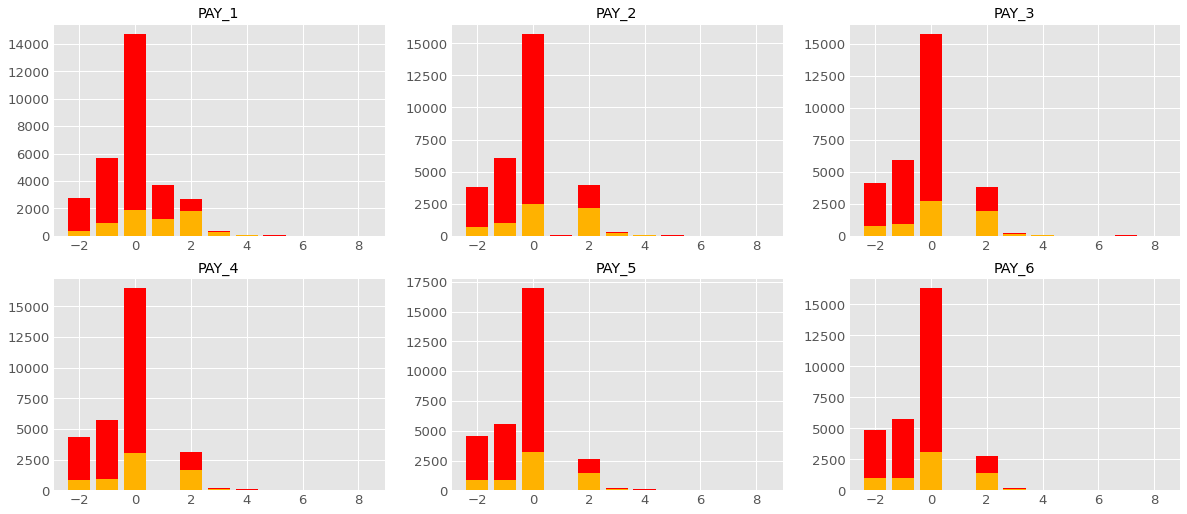

In [167]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = credit[pay_status_columns[i]].value_counts()
    x = credit[pay_status_columns[i]][(credit['DEFAULT']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

###The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.



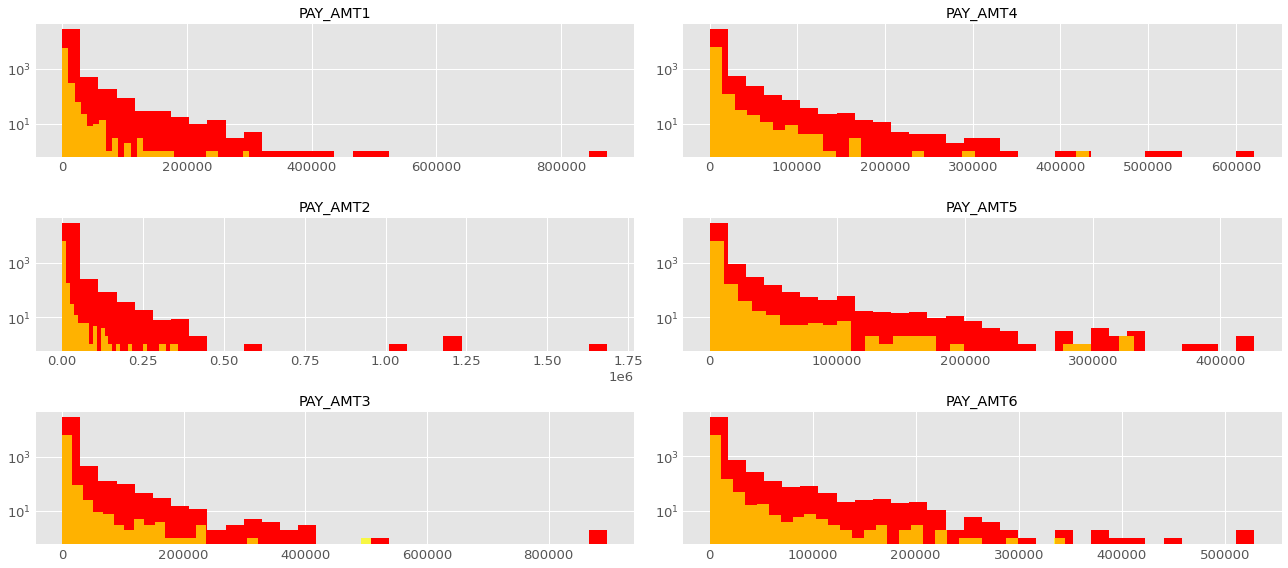

In [168]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['DEFAULT']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters


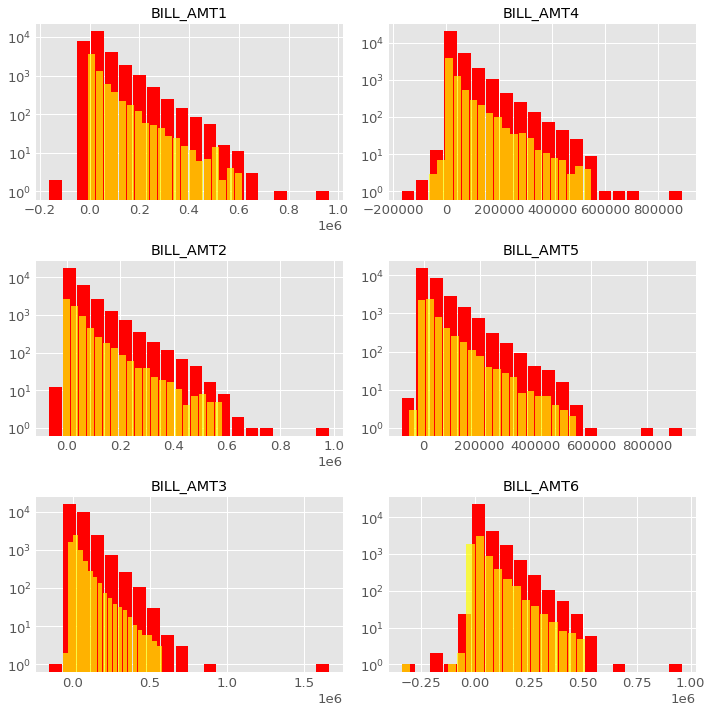

In [169]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(credit[bill_atm_columns[i]][(credit['DEFAULT']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters.

##<B> Amount of Credit Limit

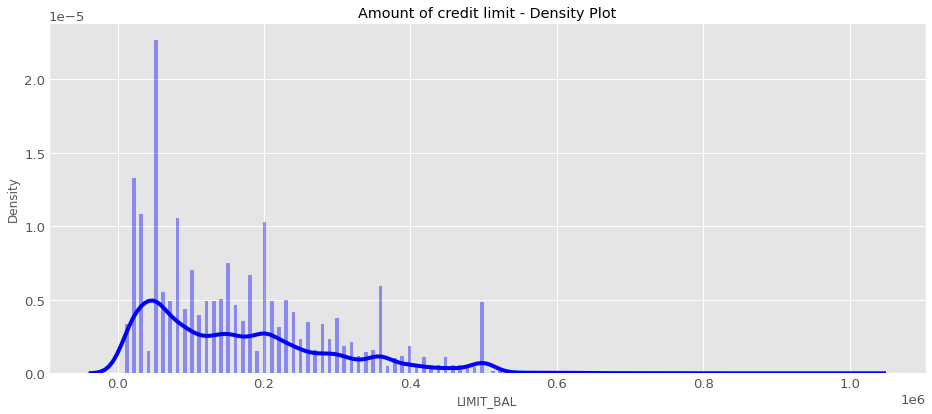

In [170]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

### Largest group of amount of credit limit is apparently for amount of 50K. Let's verify this.

In [171]:
credit['LIMIT_BAL'].value_counts().shape

(81,)

### There are 81 distinct values for amount of credit limit.


In [172]:
credit['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

#### Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

##<B> Plotting a Density curve for LIMIT_BAL

Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month.

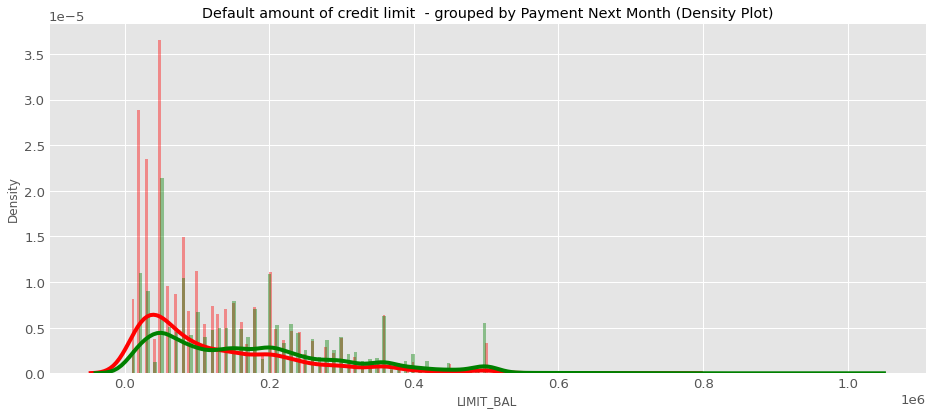

In [173]:
class_0 = credit.loc[credit['DEFAULT'] == 0]["LIMIT_BAL"]
class_1 = credit.loc[credit['DEFAULT'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

##<B>Credit limit vs Sex

Let's check the credit limit distribution vs. sex. For the sex, 1 stands for male and 2 for female.

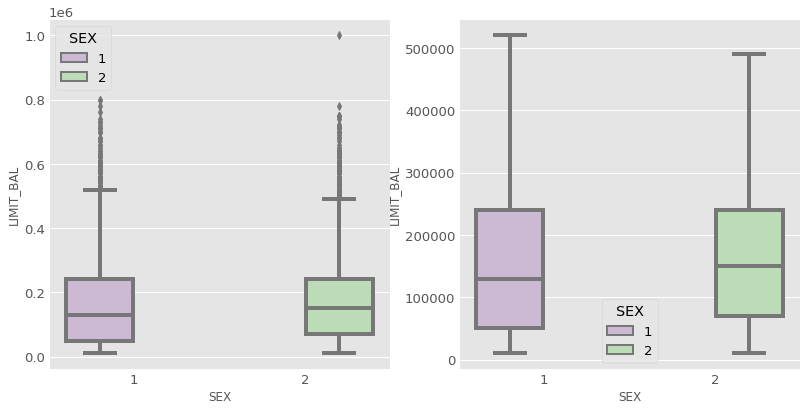

In [174]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=credit, palette="PRGn",showfliers=False)
plt.show();


The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

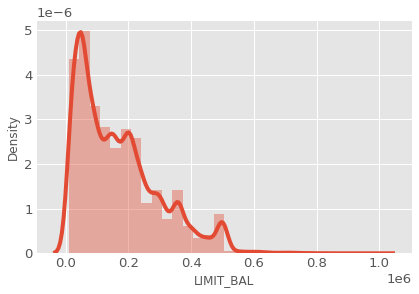

In [175]:
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=30)

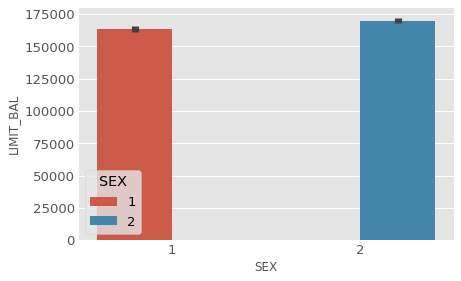

In [176]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit,hue='SEX')

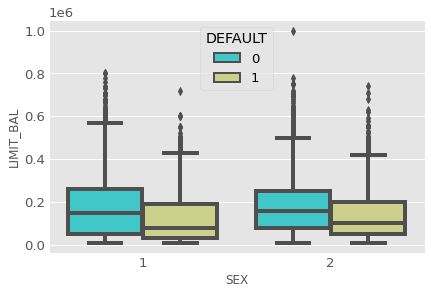

In [177]:
sns.boxplot(x='SEX',hue='DEFAULT', y='LIMIT_BAL',data=credit,palette="rainbow")

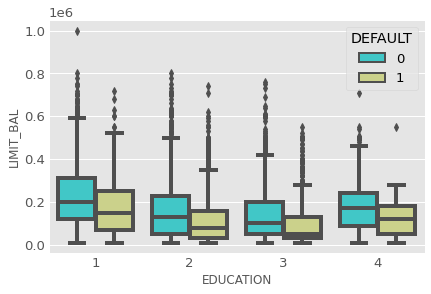

In [179]:
sns.boxplot(x='EDUCATION',hue='DEFAULT', y='LIMIT_BAL',data=credit,palette="rainbow")

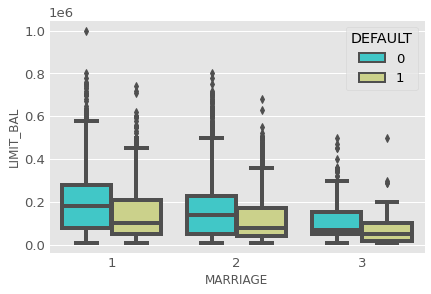

In [180]:


sns.boxplot(x='MARRIAGE',hue='DEFAULT', y='LIMIT_BAL',data=credit,palette="rainbow")

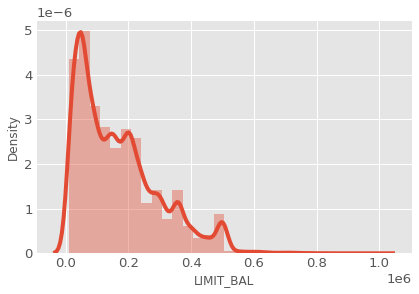

In [181]:
sns.distplot(credit['LIMIT_BAL'],kde=True,bins=30)

## Plotting columns with similar names to check the correlation

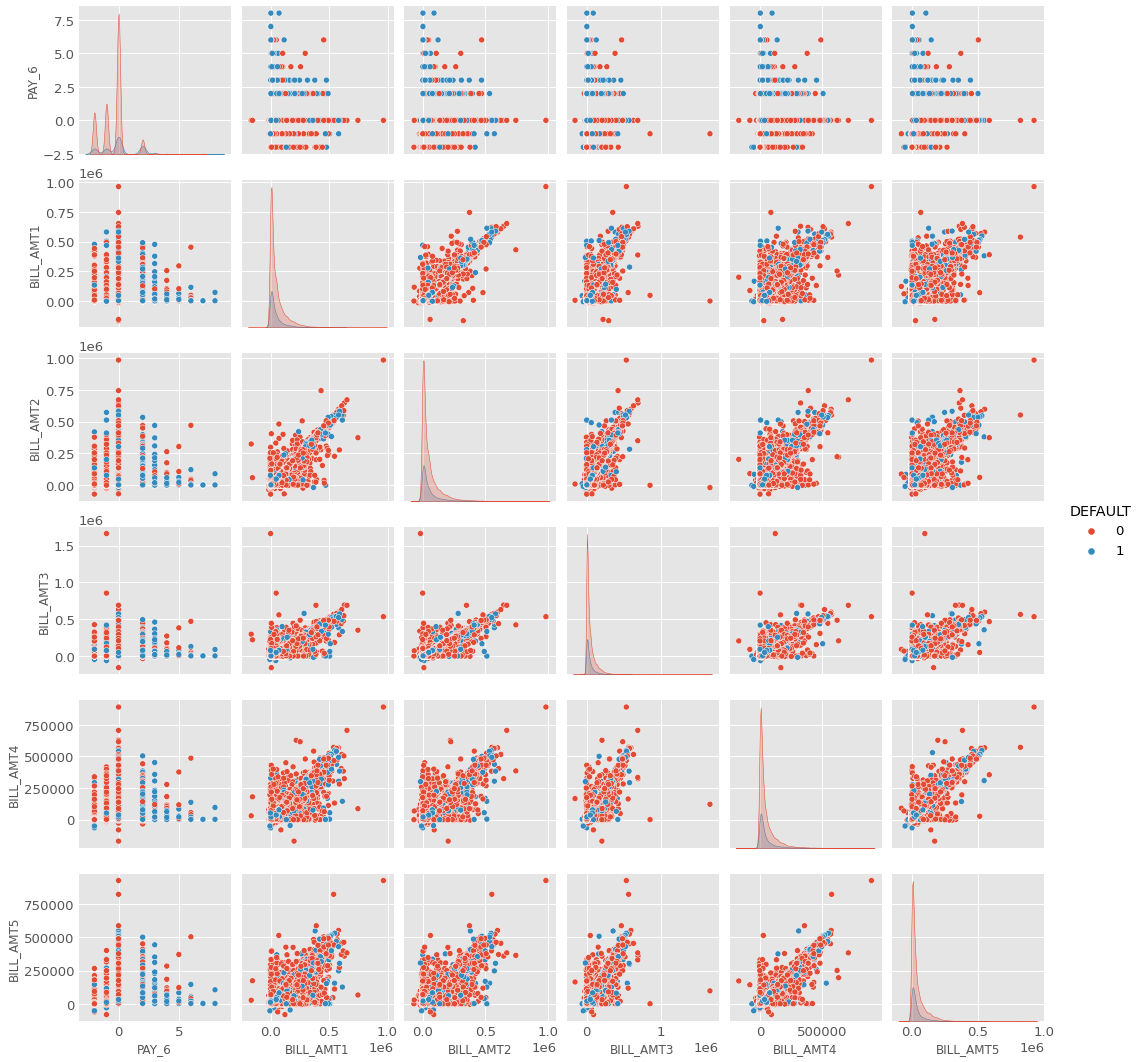

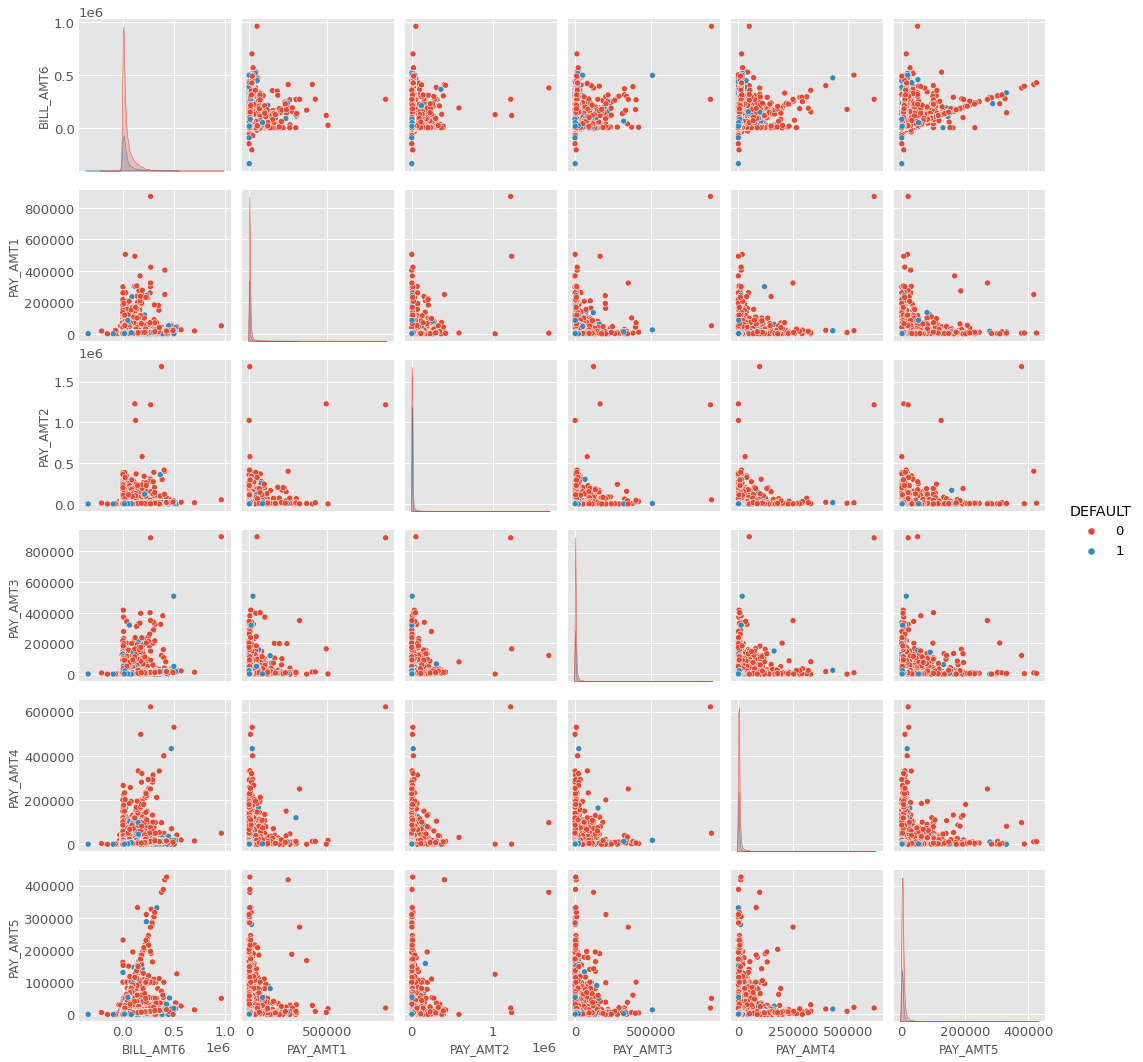

In [182]:
sns.pairplot(credit, vars=credit.columns[11:17], kind='scatter',hue= 'DEFAULT')
sns.pairplot(credit, vars=credit.columns[17:23],hue = 'DEFAULT')

#<B>Trends, Hypothesis & findings:

In [183]:
# Set ID as dataframe index

credit.set_index('ID', inplace = True)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_CAT,MARITAL_STATUS
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,university,Married
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,university,Unmarried
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,university,Unmarried
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,university,Married
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,university,Married


In [184]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

##<B>(1) On average, which sex group tends to have more delayed payments? 
##Since there are more female than male in the dataset, we will use percentage within each sex group.

30% male have default payment while 26% female have default payment, the difference is not significant.



In [185]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['HAS_DEF'],columns = df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

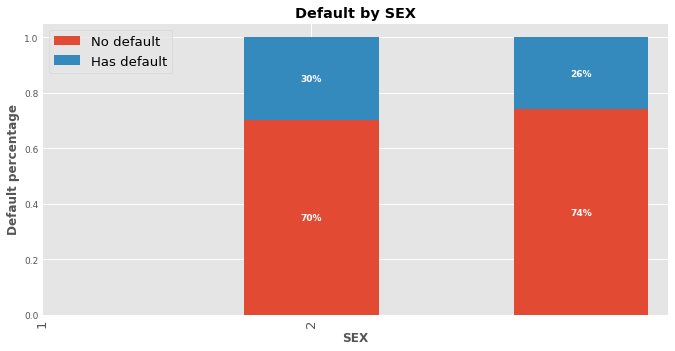

In [186]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('SEX')

#<B>Predictive Modeling

In [187]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'EDUCATION_CAT', 'MARITAL_STATUS'],
      dtype='object')

#<b>Prepare for Modeling


##<b>1. Feature Engineering

In [188]:
# Bin ‘AGE’ data to 6 groups
bins= [21,30,40,50,60,70,80]
labels = list(range(6))
credit['AGE'] = pd.cut(credit['AGE'],bins=bins, labels=labels,right=False)

# Covert categorical column into integer by extracting the code of the categories
credit.AGE = credit.AGE.cat.codes